In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
from matplotlib.pyplot import cm
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the regular expression library and preparing the data for further analysis
import re
# Load models used for prediction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [4]:
import nltk


In [11]:
variables = pd.read_csv('sentence ordered var.csv')

In [12]:
variables

,Unnamed: 0,ID,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup
0,0,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
1,1,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
2,2,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
3,3,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
4,4,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
...,...,...,...,...,...,...,...,...,...
23831,23831,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0
23832,23832,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0
23833,23833,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0
23834,23834,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0


Test

In [6]:
#importing metrics for future use
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [7]:
#to display the relevant criteria for each model
def display_results(y_actual, y_predicted): 
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    print("MSE = " ,mean_squared_error(y_actual, y_predicted))
    print("Confusion Matrix \n" ,confusion_matrix(y_actual, y_predicted))

# to generate auc-roc curve
def generate_auc_roc_curve(model, X_test, Y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show() #[6]

In [8]:
matrix = pd.read_csv('CLEAN ROBERTA MATRIX.csv').iloc[:, 1:]

In [9]:
matrix

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.266187,-0.660178,-0.371666,-0.630971,-0.358803,-1.391885,0.160033,0.478119,0.212221,1.083352,...,0.428783,-1.124803,-0.256399,0.317885,-0.474741,0.325401,-0.264061,-0.664652,-1.497020,0.201376
1,1.456210,0.427500,-0.721851,-1.493967,1.081013,-0.480533,-0.413014,0.285254,-0.340345,1.048345,...,0.122286,0.391398,-0.523072,-0.248091,0.732693,0.897241,-0.166863,0.365331,-0.282128,0.094608
2,0.739583,-0.245726,-0.108649,-0.393256,0.645251,-1.167343,-0.528575,1.418152,-0.453724,-0.278970,...,0.252741,-0.724660,0.127723,-0.177164,1.657929,1.665471,1.373241,-0.004133,-0.453870,0.624380
3,0.374601,-0.150858,-0.013419,-1.022840,1.164619,-0.045881,0.028101,1.061302,-0.381707,0.609979,...,-0.123810,-0.222101,-1.292111,-0.434329,1.273648,1.538113,-0.262821,0.068657,-1.412173,-1.031423
4,-1.297149,0.402011,-0.468558,-1.139185,-0.013028,-0.644339,0.627444,-0.580150,-0.084935,0.822124,...,0.456621,-1.399169,-0.293569,0.741714,1.205895,1.705837,0.385911,-0.196678,-0.730132,-0.134583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23831,1.515055,-0.431417,-0.304350,-0.466435,-0.280647,-0.873209,0.030019,0.229390,-0.455538,-0.576342,...,0.929256,-0.176715,-0.872528,0.681049,0.122796,0.489373,-0.130842,0.018986,0.269465,-1.186915
23832,-0.468761,-0.813230,0.421769,0.759459,0.091138,-0.172827,-0.149205,-0.041261,0.283715,0.335454,...,1.338163,-0.204426,0.074674,1.886328,1.093886,-0.110166,0.149022,0.564670,1.115814,-0.121593
23833,0.440848,-0.398213,-0.204516,-0.179232,1.043316,0.164469,0.402168,-0.003115,-0.021793,-0.256044,...,-0.553790,-0.429566,-0.554298,0.490498,0.878418,-0.329386,0.798189,-0.151085,0.666669,-0.363450
23834,-0.515678,0.541302,0.164292,0.520151,0.775367,0.363872,1.471387,-0.050492,-1.319565,0.956830,...,-0.292073,0.330839,0.187843,-0.371171,-0.284027,0.100263,-0.464110,1.139689,-2.584928,-0.620282


In [10]:
# X = df["clean1"]
# y = df["Gender"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
X = matrix
y = variables["Gender"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
y_train.value_counts()

0    9076
1    8801
Name: Gender, dtype: int64

In [16]:
y_test.value_counts()

0    3001
1    2958
Name: Gender, dtype: int64

In [17]:
len(y_test)

5959

In [19]:
#Logistic
#Instantiate, train - fit, predict and evaluate.
logreg = LogisticRegression(n_jobs=1, C=1e5,solver='lbfgs', max_iter=10000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

display_results(y_test, y_pred)

Accuracy =  0.5947306595066286
Precision =  0.5944347826086956
Recall =  0.5777552400270453
F1 Score =  0.5859763415052288
MSE =  0.4052693404933714
Confusion Matrix 
 [[1835 1166]
 [1249 1709]]


In [16]:
#Confusion matrix
conf2 = metrics.confusion_matrix(y_test, y_pred)
conf2

array([[1835, 1166],
       [1249, 1709]], dtype=int64)

In [17]:
display_results(y_test, y_pred)

Accuracy =  0.5947306595066286
Precision =  0.5944347826086956
Recall =  0.5777552400270453
F1 Score =  0.5859763415052288
MSE =  0.4052693404933714
Confusion Matrix 
 [[1835 1166]
 [1249 1709]]


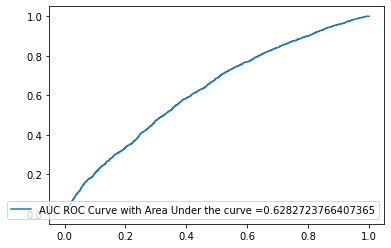

In [18]:
generate_auc_roc_curve(logreg, X_test, y_test)

In [19]:
logreg.coef_

array([[-0.14241056, -0.29679674, -0.53577797, ...,  0.00208323,
         0.00979837, -0.05278285]])

In [20]:
np.sort(logreg.coef_)

array([[-0.58038745, -0.53577797, -0.40133802, ...,  0.35843309,
         0.46265934,  0.46961963]])

In [21]:
print(logreg.coef_ )
feature_rank = np.argsort(logreg.coef_)

[[-0.14241056 -0.29679674 -0.53577797 ...  0.00208323  0.00979837
  -0.05278285]]


In [22]:
feature_rank

array([[547,   2, 369, ..., 629, 472, 539]], dtype=int64)

In [23]:
from sklearn import svm
#fit model
clf = svm.SVC(kernel='rbf', C = 0.05)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred)))

Testing accuracy 0.5890250041953348
Testing F1 score: 0.5959412638178517


In [24]:
display_results(y_test, y_pred)

Accuracy =  0.5890250041953348
Precision =  0.5820174025136964
Recall =  0.6105476673427992
F1 Score =  0.5959412638178517
MSE =  0.41097499580466523
Confusion Matrix 
 [[1704 1297]
 [1152 1806]]


In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
#create model
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random",  random_state=42),
    n_estimators=100, bootstrap=True, n_jobs=-1, random_state=42)

In [26]:
#fit moel
bag_clf.fit(X_train, y_train)
y_pred_bt = bag_clf.predict(X_test)


In [27]:
display_results(y_test, y_pred_bt)

Accuracy =  0.5984225541198188
Precision =  0.5991575991575991
Recall =  0.577079107505071
F1 Score =  0.5879111417255037
MSE =  0.40157744588018124
Confusion Matrix 
 [[1859 1142]
 [1251 1707]]


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
#fit model
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [36]:
display_results(y_test, y_pred_rf)

Accuracy =  0.615203893270683
Precision =  0.6107226107226107
Recall =  0.6200135226504395
F1 Score =  0.6153329978191578
MSE =  0.384796106729317
Confusion Matrix 
 [[1832 1169]
 [1124 1834]]


In [37]:
#get index of sorted importance
feature_rank = np.argsort(rnd_clf.feature_importances_)

In [38]:
feature_rank

array([ 220, 1000,   79, ...,  658,  651,  967], dtype=int64)

In [229]:
df = pd.read_csv('pre_clean_text2.csv', encoding = 'latin-1')

In [230]:
def cleantext(text):
    text = TEXT.extract_text(text)
    text = re.sub(r'http\S+', r'<URL>', text)
    text = re.sub(r'[\w.-]+@[\w.-]+', r'<EMAIL>', text)
    text = re.sub(r'\b\d{6,}', r'<NUMBER>', text)
    return text

In [231]:
df["clean1"]= df["clean1"].astype(str)
df['clean2']= df['clean1'].apply(cleantext)

In [232]:
df["clean2"] = df["clean1"].map(lambda x: re.sub('[,\.!?]', '', x))
df["clean2"] = df["clean2"].map(lambda x: x.lower())

<>:1: DeprecationWarning: invalid escape sequence \.
<>:1: DeprecationWarning: invalid escape sequence \.
<ipython-input-232-15932330b054>:1: DeprecationWarning: invalid escape sequence \.
  df["clean2"] = df["clean1"].map(lambda x: re.sub('[,\.!?]', '', x))


In [258]:
df=df[:698]

In [259]:
def splitline(text):
    line = TEXT._split_lines(text)
    temp = []
    for i in line:
        sen = TEXT.split_sentences(i)
        temp = temp+sen
    return temp

In [260]:
df['clean3']= df['clean2'].apply(splitline)

In [261]:
df.to_csv('df_for_faculty.csv')

In [237]:
df=df[:698]
dftest = df[df['Error']!=1]
dftest

,Unnamed: 0,index,ID,Name,Gender,Search term,Current job role,Desired job title,Salary minimum,County (; separated),...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,clean2
0,0.0,0.0,1001.0,AALIYA RAFI MOHAMMED,1.0,aerospace,intern,propulsion test engineer,35000.0,london,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,education ms in space and astronautical engin...
1,1.0,1.0,1002.0,Aaron Sanderson,0.0,mechancial,mechanical technician,tm operative,26880.0,cleveland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,profile a timed served mechanical fitter with...
2,2.0,2.0,1003.0,Aashika Dutt,1.0,construction,commercial planning engineer,cost manager,45000.0,london,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mscconstructioncostmanagementstudentatuniversi...
3,3.0,3.0,1004.0,Abdelrahim Ahmed,0.0,renewable,renewable/sustainable energy engineer,renewable/sustainable energy engineer,20480.0,lanarkshire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sustainable energy [msc] - electrical and elec...
4,4.0,4.0,1005.0,Abdullah Sulaiman,0.0,robotics,robotics engineer,robotics engineer,20000.0,london,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,skills solidworks (technical drawings prototy...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,693.0,693.0,1694.0,Yasir SiddigÂ,0.0,robotics,structures intern,graduate technical consultant,25000.0,london,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,profile energetic and highly motivated aerospa...
694,694.0,694.0,1695.0,Yordanka Brankova,1.0,construction,civil engineer,civil engineer,19200.0,hampshire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a highly qualified experienced and dynamic pro...
695,695.0,695.0,1696.0,yusuf ziya Cunlu,0.0,construction,construction site manager,civil engineer,40000.0,gwynedd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,innovative construction manager skilled in mot...
696,696.0,696.0,1697.0,Zahra Latif Choudhary,1.0,rail,graduate engineer,graduate engineer,23000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,profile i am an engineering graduate looking f...


In [238]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = dftest.clean2.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lavin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['education', 'ms', 'space', 'astronautical', 'engineering', 'sapienza', 'university', 'rome', 'italy', 'relevant', 'coursework', 'compressible', 'flows', 'experimental', 'aerodynamics', 'spaceflight', 'mechanics', 'space', 'mission', 'systems', 'space', 'propulsion', 'spacecraft', 'design', 'aerospace', 'structures', 'control', 'system', 'aerospace', 'material']


In [239]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 3), (8, 3), (9, 1), (10, 1), (11, 8), (12, 2), (13, 1), (14, 2), (15, 1), (16, 2), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 3), (29, 1)]


In [240]:
from pprint import pprint
# number of topics
num_topics = 8
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.009*"project" + 0.008*"management" + 0.006*"team" + 0.006*"engineering" + '
  '0.005*"design" + 0.005*"new" + 0.004*"work" + 0.004*"projects" + '
  '0.004*"skills" + 0.004*"quality"'),
 (1,
  '0.011*"project" + 0.007*"work" + 0.007*"engineering" + 0.005*"design" + '
  '0.005*"management" + 0.005*"skills" + 0.005*"mechanical" + 0.005*"engineer" '
  '+ 0.005*"working" + 0.004*"new"'),
 (2,
  '0.012*"project" + 0.010*"management" + 0.007*"engineering" + 0.005*"team" + '
  '0.005*"design" + 0.005*"engineer" + 0.004*"work" + 0.004*"manager" + '
  '0.004*"construction" + 0.004*"experience"'),
 (3,
  '0.009*"project" + 0.008*"management" + 0.007*"design" + 0.006*"engineering" '
  '+ 0.006*"engineer" + 0.005*"work" + 0.004*"projects" + 0.004*"team" + '
  '0.004*"site" + 0.004*"business"'),
 (4,
  '0.007*"project" + 0.007*"engineering" + 0.005*"design" + 0.005*"engineer" + '
  '0.005*"work" + 0.005*"management" + 0.004*"team" + 0.004*"skills" + '
  '0.004*"experience" + 0.004*"working

In [241]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/Users/lavin/Documents/MSc BA/Dissertation/Enginuity/LDAviz/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/Users/lavin/Documents/MSc BA/Dissertation/Enginuity/LDAviz/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared


C:\Users\lavin\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.000936  0.010238       1        1  28.678120
2      0.004852  0.000841       2        1  24.273312
3      0.006005 -0.000621       3        1  14.773425
5      0.000419 -0.005097       4        1   9.168184
7      0.000198 -0.002781       5        1   7.285243
6     -0.001963 -0.000651       6        1   6.488737
0      0.001022 -0.000741       7        1   4.678477
4     -0.009597 -0.001188       8        1   4.654503, topic_info=             Term         Freq        Total Category  logprob  loglift
49         design  2626.000000  2626.000000  Default  30.0000  30.0000
179       project  4224.000000  4224.000000  Default  29.0000  29.0000
130    management  3079.000000  3079.000000  Default  28.0000  28.0000
61    engineering  2782.000000  2782.000000  Default  27.0000  27.0000
416          team  1858.000000  1858.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
292  construction    52.285908  1375.599854   Topic8  -5.9122  -0.2026
405          site    51.897972  1527.634277   Topic8  -5.9197  -0.3149
180      projects    51.159115  1577.283203   Topic8  -5.9340  -0.3612
601    production    45.620399  1063.403442   Topic8  -6.0486  -0.0815
246    university    43.250565   939.305603   Topic8  -6.1020  -0.0108

[695 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
23561      1  0.167087    aaf
23561      2  0.167087    aaf
23561      3  0.167087    aaf
23561      4  0.334173    aaf
23561      6  0.167087    aaf
...      ...       ...    ...
753        4  0.098438  years
753        5  0.045573  years
753        6  0.074740  years
753        7  0.047396  years
753        8  0.072917  years

[1797 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 6, 8, 7, 1, 5])

In [220]:
def make_topics(df, topic_number,filepath):

    data = df.values.tolist()
    data_words = list(sent_to_words(data))
    # remove stop words
    data_words = remove_stopwords(data_words)

    id2word = corpora.Dictionary(data_words)
    # Create Corpus
    texts = data_words
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    num_topics = topic_number
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics)
    # Print the Keyword in the 10 topics
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]


    # Visualize the topics
    pyLDAvis.enable_notebook()
    LDAvis_data_filepath = os.path.join(filepath,'ldavis_prepared_'+str(num_topics))
    # # this is a bit time consuming - make the if statement True
    # # if you want to execute visualization prep yourself
    if 1 == 1:
        LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)
    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, filepath+'ldavis_prepared_'+ str(num_topics) +'.html')
    LDAvis_prepared

In [242]:
#female
filepath ='/Users/lavin/Documents/MSc BA/Dissertation/Enginuity/LDAviz/all_female/'
df = dftest[dftest['Gender']==1]
topic_number = 10
make_topics(df, topic_number,filepath)


[(0,
  '0.011*"nan" + 0.007*"project" + 0.006*"engineering" + 0.006*"management" + '
  '0.005*"design" + 0.005*"work" + 0.005*"new" + 0.004*"working" + '
  '0.004*"engineer" + 0.004*"business"'),
 (1,
  '0.018*"nan" + 0.010*"project" + 0.009*"management" + 0.007*"design" + '
  '0.006*"team" + 0.006*"engineering" + 0.005*"engineer" + 0.005*"skills" + '
  '0.005*"work" + 0.005*"projects"'),
 (2,
  '0.014*"nan" + 0.011*"project" + 0.008*"management" + 0.007*"engineering" + '
  '0.007*"design" + 0.005*"work" + 0.005*"skills" + 0.005*"engineer" + '
  '0.005*"team" + 0.004*"systems"'),
 (3,
  '0.021*"nan" + 0.010*"project" + 0.006*"design" + 0.006*"management" + '
  '0.006*"engineering" + 0.006*"work" + 0.005*"engineer" + 0.004*"projects" + '
  '0.004*"skills" + 0.004*"team"'),
 (4,
  '0.009*"nan" + 0.009*"project" + 0.007*"management" + 0.006*"engineering" + '
  '0.005*"development" + 0.005*"business" + 0.005*"design" + 0.004*"team" + '
  '0.004*"projects" + 0.004*"skills"'),
 (5,
  '0.015*

In [ ]:
#male
filepath ='/Users/lavin/Documents/MSc BA/Dissertation/Enginuity/LDAviz/all_male/'
df = df[df['Gender']==1]
topic_number = 10
make_topics(df, topic_number,filepath)

In [247]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lavin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [248]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer("english")
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [251]:
# doc_sample = dftest['clean2'].values[0]
# print('original document: ')
# words = []
# for word in doc_sample.split(' '):
#     words.append(word)
# print(words)
# print('\n\n tokenized and lemmatized document: ')
# print(preprocess(doc_sample))

In [250]:
dftest['processed']= dftest['clean2'].apply(preprocess)

In [254]:
# Create Dictionary
data_words = dftest['processed'].values.tolist()
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(filepath,'ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, filepath+'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

[(0,
  '0.020*"engin" + 0.014*"project" + 0.013*"manag" + 0.011*"design" + '
  '0.010*"work" + 0.008*"develop" + 0.007*"process" + 0.006*"team" + '
  '0.005*"test" + 0.005*"oper"'),
 (1,
  '0.017*"project" + 0.016*"engin" + 0.014*"manag" + 0.012*"work" + '
  '0.010*"design" + 0.006*"site" + 0.006*"develop" + 0.006*"experi" + '
  '0.006*"team" + 0.005*"skill"'),
 (2,
  '0.019*"project" + 0.017*"manag" + 0.014*"engin" + 0.014*"work" + '
  '0.012*"design" + 0.009*"develop" + 0.007*"team" + 0.006*"includ" + '
  '0.006*"process" + 0.005*"mechan"'),
 (3,
  '0.021*"manag" + 0.014*"project" + 0.014*"work" + 0.012*"engin" + '
  '0.007*"includ" + 0.007*"team" + 0.006*"skill" + 0.006*"site" + '
  '0.006*"custom" + 0.006*"servic"'),
 (4,
  '0.016*"manag" + 0.015*"work" + 0.013*"engin" + 0.013*"design" + '
  '0.013*"project" + 0.008*"develop" + 0.006*"includ" + 0.005*"team" + '
  '0.005*"ensur" + 0.005*"product"'),
 (5,
  '0.023*"engin" + 0.017*"work" + 0.013*"project" + 0.011*"manag" + '
  '0.007*

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.008893  0.001666       1        1  26.648907
5     -0.001641 -0.006312       2        1  19.828735
3     -0.004413  0.009866       3        1  11.417979
7     -0.001803 -0.002444       4        1   9.861890
0      0.001523 -0.008178       5        1   8.303705
1     -0.001451  0.000232       6        1   7.165716
8      0.003119 -0.001543       7        1   7.137593
2     -0.003261 -0.001762       8        1   6.638017
9      0.014819  0.003003       9        1   1.758475
4      0.002001  0.005472      10        1   1.238988, topic_info=        Term         Freq        Total Category  logprob  loglift
194     work  4843.000000  4843.000000  Default  30.0000  30.0000
96     manag  6437.000000  6437.000000  Default  29.0000  29.0000
131  project  5849.000000  5849.000000  Default  28.0000  28.0000
48     engin  5864.000000  5864.000000  Default  27.0000  27.0000
39    design  3585.000000  3585.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
307   servic    14.771089  1361.535889  Topic10  -5.7372  -0.1328
101   mechan    15.171777  1554.778442  Topic10  -5.7105  -0.2388
856  respons    14.003793  1198.780518  Topic10  -5.7906  -0.0589
554   report    13.694201  1215.927002  Topic10  -5.8129  -0.0954
511   custom    14.035306  1465.879272  Topic10  -5.7883  -0.2578

[836 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
8732       2  0.382636      aalto
17037      3  0.250348  abbeywood
17037      7  0.250348  abbeywood
710        1  0.245142     achiev
710        2  0.273908     achiev
...      ...       ...        ...
6288       4  0.268037      zhang
6288       5  0.089346      zhang
6288       6  0.089346      zhang
6288       7  0.089346      zhang
6288       8  0.089346      zhang

[2324 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 4, 8, 1, 2, 9, 3, 10, 5])

In [255]:
# Create Dictionary
data_words = dftest[dftest['Gender']==1]['processed'].values.tolist()
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(filepath,'ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, filepath+'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

[(0,
  '0.020*"project" + 0.019*"manag" + 0.015*"engin" + 0.011*"work" + '
  '0.010*"design" + 0.009*"develop" + 0.008*"product" + 0.008*"test" + '
  '0.006*"includ" + 0.006*"team"'),
 (1,
  '0.015*"engin" + 0.012*"design" + 0.012*"project" + 0.012*"manag" + '
  '0.011*"work" + 0.008*"team" + 0.008*"develop" + 0.007*"skill" + '
  '0.006*"custom" + 0.006*"product"'),
 (2,
  '0.018*"manag" + 0.017*"engin" + 0.017*"project" + 0.012*"work" + '
  '0.010*"design" + 0.008*"develop" + 0.007*"process" + 0.006*"product" + '
  '0.006*"plan" + 0.006*"busi"'),
 (3,
  '0.015*"manag" + 0.013*"project" + 0.012*"engin" + 0.011*"work" + '
  '0.008*"design" + 0.007*"team" + 0.006*"process" + 0.006*"product" + '
  '0.005*"skill" + 0.005*"develop"'),
 (4,
  '0.017*"project" + 0.016*"manag" + 0.011*"engin" + 0.010*"work" + '
  '0.009*"team" + 0.008*"develop" + 0.007*"process" + 0.007*"plan" + '
  '0.006*"design" + 0.005*"product"'),
 (5,
  '0.021*"engin" + 0.014*"work" + 0.012*"project" + 0.011*"manag" + '


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.003194  0.000987       1        1  20.670969
7      0.010686 -0.006837       2        1  19.696852
8     -0.000260  0.006318       3        1  12.140783
9      0.001591  0.000655       4        1  12.078847
1     -0.003448 -0.010111       5        1   8.780302
6      0.008033  0.001165       6        1   7.987332
5     -0.016417 -0.000571       7        1   7.286161
2     -0.000984  0.001746       8        1   6.764282
3     -0.000453  0.000941       9        1   2.450064
4      0.004446  0.005706      10        1   2.144411, topic_info=         Term         Freq        Total Category  logprob  loglift
131   project  2810.000000  2810.000000  Default  30.0000  30.0000
48      engin  2413.000000  2413.000000  Default  29.0000  29.0000
96      manag  3024.000000  3024.000000  Default  28.0000  28.0000
194      work  2028.000000  2028.000000  Default  27.0000  27.0000
39     design  1637.000000  1637.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1104  support    12.325191   563.670898  Topic10  -5.7369   0.0195
367      oper    13.198268   681.884338  Topic10  -5.6684  -0.1025
51     experi    13.698689   849.295471  Topic10  -5.6312  -0.2848
553     ensur    13.243606   747.853699  Topic10  -5.6650  -0.1914
173      test    12.471867   884.337646  Topic10  -5.7251  -0.4191

[814 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
10529      5  0.558045   aakar
10530      5  0.557887  achari
438        1  0.213306  achiev
438        2  0.183605  achiev
438        3  0.121504  achiev
...      ...       ...     ...
10630      4  0.219658   zirku
10630      5  0.219658   zirku
10630      6  0.219658   zirku
10630      9  0.219658   zirku
10631      2  0.309360    zwsc

[2282 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 9, 10, 2, 7, 6, 3, 4, 5])

In [256]:
# Create Dictionary
data_words = dftest[dftest['Gender']==0]['processed'].values.tolist()
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(filepath,'ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, filepath+'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

[(0,
  '0.015*"work" + 0.013*"manag" + 0.012*"engin" + 0.011*"project" + '
  '0.009*"design" + 0.006*"includ" + 0.005*"develop" + 0.005*"oper" + '
  '0.005*"team" + 0.005*"instal"'),
 (1,
  '0.019*"project" + 0.017*"manag" + 0.017*"engin" + 0.017*"work" + '
  '0.009*"develop" + 0.008*"design" + 0.008*"team" + 0.006*"site" + '
  '0.006*"experi" + 0.006*"includ"'),
 (2,
  '0.021*"work" + 0.019*"manag" + 0.018*"project" + 0.017*"engin" + '
  '0.011*"design" + 0.008*"construct" + 0.006*"site" + 0.006*"mechan" + '
  '0.006*"includ" + 0.006*"experi"'),
 (3,
  '0.013*"manag" + 0.013*"engin" + 0.013*"project" + 0.010*"design" + '
  '0.010*"work" + 0.009*"develop" + 0.005*"team" + 0.005*"construct" + '
  '0.005*"custom" + 0.005*"train"'),
 (4,
  '0.014*"project" + 0.013*"engin" + 0.013*"manag" + 0.011*"work" + '
  '0.008*"design" + 0.007*"develop" + 0.006*"system" + 0.005*"oper" + '
  '0.005*"team" + 0.005*"train"'),
 (5,
  '0.017*"engin" + 0.015*"design" + 0.013*"project" + 0.012*"work" + '
  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.011391  0.002115       1        1  29.544556
1     -0.007618  0.001566       2        1  24.397493
2     -0.014183  0.002248       3        1  19.979317
6      0.013000  0.012947       4        1   8.510305
3      0.003915  0.002272       5        1   6.337219
8      0.009975 -0.014411       6        1   4.750670
5     -0.005434 -0.007009       7        1   3.715701
7      0.003271  0.004660       8        1   1.077263
4      0.006312 -0.002267       9        1   0.973047
0      0.002153 -0.002119      10        1   0.714426, topic_info=        Term         Freq        Total Category  logprob  loglift
238    manag  3276.000000  3276.000000  Default  30.0000  30.0000
44     engin  3251.000000  3251.000000  Default  29.0000  29.0000
168     work  3120.000000  3120.000000  Default  28.0000  28.0000
248  project  2929.000000  2929.000000  Default  27.0000  27.0000
193   design  1933.000000  1933.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
124   requir     4.627403   717.908081  Topic10  -5.6897  -0.1029
82     level     4.518073   692.572327  Topic10  -5.7136  -0.0909
146   system     4.807993   868.431396  Topic10  -5.6514  -0.2550
85   mainten     4.503821   722.109192  Topic10  -5.7168  -0.1358
51    experi     4.797371   950.161743  Topic10  -5.6536  -0.3471

[834 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
10736      4  0.584742      aai
2673       1  0.272169     abat
2673       2  0.272169     abat
2673       3  0.272169     abat
2673       7  0.272169     abat
...      ...       ...      ...
169        7  0.037884     year
169        8  0.007577     year
169        9  0.007577     year
169       10  0.007577     year
9823       5  0.409733  yousoft

[2211 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 3, 7, 4, 9, 6, 8, 5, 1])

In [226]:
df = df[df['Error']!=1]

In [227]:
df

,Unnamed: 0,index,ID,Name,Gender,Search term,Current job role,Desired job title,Salary minimum,County (; separated),...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,clean2
0,0.0,0.0,1001.0,AALIYA RAFI MOHAMMED,1.0,aerospace,intern,propulsion test engineer,35000.0,london,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,education ms in space and astronautical engin...
2,2.0,2.0,1003.0,Aashika Dutt,1.0,construction,commercial planning engineer,cost manager,45000.0,london,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mscconstructioncostmanagementstudentatuniversi...
5,5.0,5.0,1006.0,ACHALA WITHANAGE,1.0,mechancial,mechanical engineer,mechanical engineer,17000.0,lancashire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,professianal profile highly reliable articulat...
8,8.0,8.0,1009.0,Adele Healy,1.0,automative,automotive manager,automotive manager,100000.0,lancashire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,i hold a full driving licence with no points e...
15,15.0,15.0,1016.0,Adrija PalliyilÂ,1.0,renewable,renewable energy engineer,renewable energy engineer,20000.0,hampshire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,career objective to enhance my educational and...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,682.0,682.0,1683.0,Viviane Ciupka do Prado,1.0,construction,civil engineer,project manager,20000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,project manager & civil engineer certification...
689,689.0,689.0,1690.0,Wioleta Kugler,1.0,logistics,logistics operator,freight forwarding clerk,32000.0,london,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,i am a multi-lingual speaking transport specia...
690,690.0,690.0,1691.0,Yana Kuptsova,1.0,construction,design engineer,cad designer,35000.0,london,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,education: pridneprovsk state academy of civil...
694,694.0,694.0,1695.0,Yordanka Brankova,1.0,construction,civil engineer,civil engineer,19200.0,hampshire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a highly qualified experienced and dynamic pro...


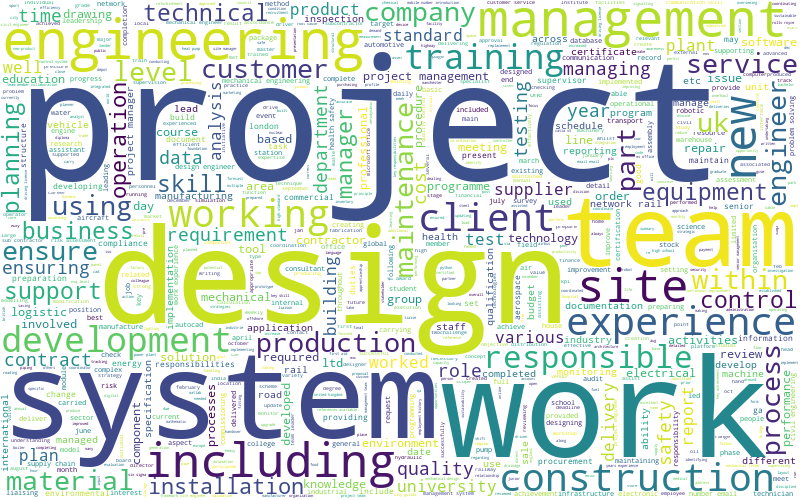

In [148]:
#Join the different processed titles together.
plong_string = ','.join(list(df['clean2'].values))

#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=5, contour_color='steelblue', width = 800, height = 500)

#Generate a word cloud
wordcloud.generate(plong_string)

#Visualize the word cloud
wordcloud.to_image()

# LDA

In [191]:
#Print out topics function
def print_topics(data, number_words, group_name):
    groupname = group_name
    
    #Initialise the count vectorizer with the English stop words
    count_vectorizer = CountVectorizer(stop_words='english')
    count_data = count_vectorizer.fit_transform(data)
    
    #Fit and transform the processed titles
    lda = LDA(n_components=number_topics, n_jobs=-1)
    lda.fit(count_data)
    words = count_vectorizer.get_feature_names()
    
    topiclist1 =[]
    for topic_idx, topic in enumerate(lda.components_):
        topiclist = [words[i]for i in topic.argsort()[:-number_words - 1:-1]]
        topiclist1 = topiclist1+topiclist
        print("\n" + group_name, "Topic #%d:" % topic_idx)
        print(" ".join(topiclist))
    
    return topiclist1

#Set topics intended and words per topic: The following parameters displayed clearer results after tries
number_topics = 5
number_words = 5

In [195]:
print_topics(df['clean2'],10, "all")
print("end")


all Topic #0:
management project design team business engineering process new manager projects

all Topic #1:
data sql web software using development developer server java application

all Topic #2:
engineering mechanical work skills working maintenance systems experience design level

all Topic #3:
management quality safety design team training site rail energy customer

all Topic #4:
project construction site design engineer management work engineering rail works
end


In [200]:
print_topics(df[df['Gender']==0]['clean2'],5, "all")
print("end")


all Topic #0:
mechanical engineering work maintenance systems

all Topic #1:
management project team engineering site

all Topic #2:
energy water systems engineering developed

all Topic #3:
design engineer using work inspection

all Topic #4:
project design engineer engineering rail
end


In [199]:
print_topics(df[df['Gender']==1]['clean2'],5, "all")
print("end")


all Topic #0:
engineering design university project skills

all Topic #1:
skills team work engineering working

all Topic #2:
project management business projects manager

all Topic #3:
mechanical assembly sales drawings working

all Topic #4:
project design engineer management engineering
end


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Columns: 101 entries, Unnamed: 0 to clean2
dtypes: float64(1), int64(9), object(91)
memory usage: 550.9+ KB


In [180]:
#Function to help taking a section based on groups - trip types
def subseting1 (cat,pn):
    if pn == "Female":
        subsets1 = df[(df["Search term"]==cat)&(df["Gender"]==1)]['clean2']
    elif pn == "Male":
        subsets1 = df[(df["Search term"]==cat)&(df["Gender"]==0)]['clean2']
    return subsets1

In [173]:
df['Search term'].unique()

array(['aerospace', 'mechancial', 'construction', 'renewable', 'robotics',
       'heat pump', 'automative', 'logistics', 'nuclear',
       'net zero and/or green', 'rail', 'environmental',
       'digital engineer'], dtype=object)

In [194]:
for i in df['Search term'].unique():
    for j in ['Female', "Male"]:
        print_topics(subseting1(i, j), 5, i+" "+j)


aerospace Female Topic #0:
design management aerospace engineering production

aerospace Female Topic #1:
design quality engineering project customer

aerospace Female Topic #2:
team design management project aircraft

aerospace Female Topic #3:
aerospace working engineering project development

aerospace Female Topic #4:
management business control team risk

aerospace Male Topic #0:
project design aerospace engineering customer

aerospace Male Topic #1:
quality management aerospace team mapping

aerospace Male Topic #2:
aerospace welding level working engineering

aerospace Male Topic #3:
design cnc aerospace engineering production

aerospace Male Topic #4:
engineering project management aerospace team

mechancial Female Topic #0:
drawings assembly mechanical working surface

mechancial Female Topic #1:
project engineering mechanical management team

mechancial Female Topic #2:
maintenance mechanical jan reedcouk sunny

mechancial Female Topic #3:
design mechanical engineering proje


digital engineer Male Topic #0:
angular developer end development software

digital engineer Male Topic #1:
fi worked date english birth

digital engineer Male Topic #2:
data using software engineer sas

digital engineer Male Topic #3:
data using development spring professional

digital engineer Male Topic #4:
data bi power platform belgaum


In [257]:
dftest.to_csv('dftest.csv')